In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dem_stitcher.stitcher import stitch_dem
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt

In [3]:
dst_area_or_point = 'Point'
dst_ellipsoidal_height = True
dem_name = 'glo_30'

In [4]:
%%time

# Central coast
# xmin, ymin, xmax, ymax
bounds = [-121.5, 34.95, -120.2, 36.25]

X, p = stitch_dem(bounds,
                  dem_name=dem_name,
                  dst_ellipsoidal_height=dst_ellipsoidal_height,
                  dst_area_or_point=dst_area_or_point)

Reading glo_30 Datasets: 100%|██████████████████████████████| 6/6 [00:08<00:00,  1.34s/it]


CPU times: user 6.18 s, sys: 1.77 s, total: 7.95 s
Wall time: 1min 6s


Text(0, 0.5, 'Latitude')

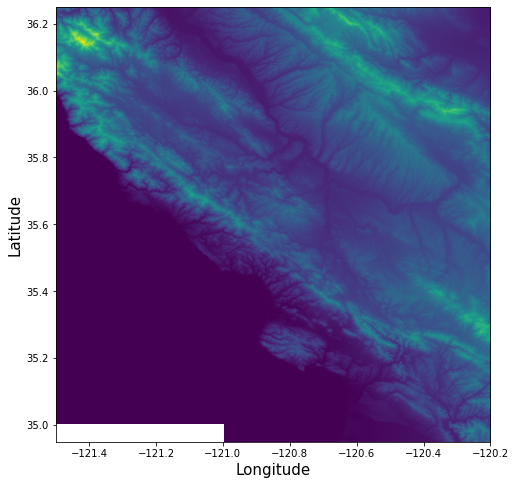

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = plot.show(X, transform=p['transform'], ax=ax)
ax.set_xlabel('Longitude', size=15)
ax.set_ylabel('Latitude', size=15)

Write the file and ensure tags are specified.

In [6]:
height_type = 'ellipsoidal' if dst_ellipsoidal_height else 'geoid'

with rasterio.open(f'{dem_name}_{height_type}_{dst_area_or_point}.tif', 'w', **p) as ds:
    ds.write(X, 1)
    ds.update_tags(AREA_OR_POINT=dst_area_or_point) 